In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from ema_workbench.analysis import parcoords
from ema_workbench.util.utilities import load_results

In [2]:
# load results
experiment, outcomes = load_results('r1.tar.gz')
outcomesdf = pd.DataFrame.from_dict(outcomes)

In [3]:
# Divide the dataset into the different policies
best_pol = outcomesdf.iloc[-1000:,:]
rd_pol1 = outcomesdf.iloc[:1000,:]
rd_pol2 = outcomesdf.iloc[1000:2000,:]
rd_pol3 = outcomesdf.iloc[2000:3000,:]
rd_pol4 = outcomesdf.iloc[3000:4000,:]
rd_pol5 = outcomesdf.iloc[4000:5000,:]
rd_pol6 = outcomesdf.iloc[5000:6000,:]
rd_pol7 = outcomesdf.iloc[6000:7000,:]
rd_pol8 = outcomesdf.iloc[7000:8000,:]
rd_pol9 = outcomesdf.iloc[8000:9000,:]
rd_pol10 = outcomesdf.iloc[9000:10000,:]

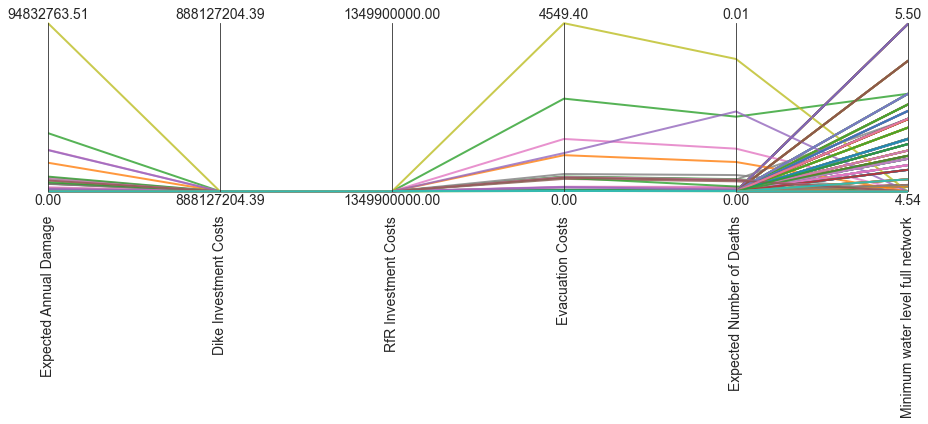

In [4]:
# Plot the outcomes of the best run over 1000 scenarios
limits = parcoords.get_limits(best_pol)

mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['figure.figsize'] = (13,6)
axes = parcoords.ParallelAxes(round(limits,2))
axes.plot(best_pol, alpha = 0.8)

plt.show()

In [5]:
objectives = ['Expected Annual Damage', 'Dike Investment Costs','RfR Investment Costs','Evacuation Costs',
              'Expected Number of Deaths','Minimum water level full network']

In [6]:
# Calculate robustness metrics
def hurwitz(data,column_names,alpha=0):
    '''weighs off the best and worst payoffs'''
    results = {}
    
    for column_name in column_names:
        Max_value = data[column_name].max()
        Min_value = data[column_name].min()

        #calculate hurwitz coefficient as described in Arrow (1972)
        hurwitz_coef = alpha * Max_value + (1-alpha) * Min_value
        results[column_name] = hurwitz_coef   
    
    return results

def mean_variance(data,column_names):
    '''for miminalisation this is defined as the mean times the standard deviation (Kwakkel et al, 2019)'''
    '''for maximization this is defined as the mean divided by the standard deviation (Kwakkel et al, 2019)'''
    results = {}
    
    for column_name in column_names:
        if column_name == 'Minimum water level full network':
            mean_value = data[column_name].mean()
            std_value = data[column_name].std()
            if abs(std_value) < 0.001:
                mv_coef = 0
            else:
                mv_coef = round(mean_value/std_value, 3)
            results[column_name] = mv_coef
    
        else:
            mean_value = data[column_name].mean()
            std_value = data[column_name].std()                
            mv_coef = round(mean_value*std_value, 3)
            results[column_name] = mv_coef
    
    return results

def quartile_skewedness(data,column_names):
    '''returns the quartile that contains the most observations'''
    results = {}
    Values = {}
    for column_name in column_names:
        #place all results in four equally spaced bins
        data['MyQuantileBins'] =  pd.cut(data[column_name], 4)
        values = data['MyQuantileBins'].value_counts()
        Values[column_name] = values
        #determine which quartile (bin) is overrepresented (contains the most values)
        for i in range(3):
            if max(values) == values[i]:
                #save the quartile and the percentage of values it contains in a dictionary
                results[column_name] = (i+1,(round(values[i]/values.sum(),3)))    
    return results, Values

In [7]:
# Plotting of the metrics

#makes a dict of hurwitz values of alpha=0,0.5,1 for each column and then plots the dict
def hurwitz_results(results,objectives,policy_nr,rd1,rd2,rd3,rd4,rd5):
    hurlist = [hurwitz(results,objectives,0),hurwitz(results,objectives,0.5),hurwitz(results,objectives,1)]
    hurlistrd1 = [hurwitz(rd1,objectives,0),hurwitz(rd1,objectives,0.5),hurwitz(rd1,objectives,1)]
    hurlistrd2 = [hurwitz(rd2,objectives,0),hurwitz(rd2,objectives,0.5),hurwitz(rd2,objectives,1)]
    hurlistrd3 = [hurwitz(rd3,objectives,0),hurwitz(rd3,objectives,0.5),hurwitz(rd3,objectives,1)]
    hurlistrd4 = [hurwitz(rd4,objectives,0),hurwitz(rd4,objectives,0.5),hurwitz(rd4,objectives,1)]
    hurlistrd5 = [hurwitz(rd5,objectives,0),hurwitz(rd5,objectives,0.5),hurwitz(rd5,objectives,1)]
    
    for i in objectives:
        metric = {}
        counter = 0
        for j in hurlist:
            metric['Alpha = ' + str(counter)] = j[i]
            counter += 0.5
        metricrd1 = {}
        counter = 0
        for j in hurlistrd1:
            metricrd1['Alpha = ' + str(counter)] = j[i]
            counter += 0.5
        metricrd2 = {}
        counter = 0
        for j in hurlistrd2:
            metricrd2['Alpha = ' + str(counter)] = j[i]
            counter += 0.5
        metricrd3 = {}
        counter = 0
        for j in hurlistrd3:
            metricrd3['Alpha = ' + str(counter)] = j[i]
            counter += 0.5
        metricrd4 = {}
        counter = 0
        for j in hurlistrd4:
            metricrd4['Alpha = ' + str(counter)] = j[i]
            counter += 0.5
        metricrd5 = {}
        counter = 0
        for j in hurlistrd5:
            metricrd5['Alpha = ' + str(counter)] = j[i]
            counter += 0.5
        X_axis = np.arange(3)
        plt.title('Results Hurwitz')
        plt.bar(X_axis - 0.25, list(metric.values()), align='center', color = 'seagreen',width = 0.1)
        plt.bar(X_axis - 0.15, list(metricrd1.values()), align='center', color = 'grey',width = 0.1)
        plt.bar(X_axis - 0.05, list(metricrd2.values()), align='center', color = 'grey',width = 0.1)
        plt.bar(X_axis + 0.05, list(metricrd3.values()), align='center', color = 'grey',width = 0.1)
        plt.bar(X_axis + 0.15, list(metricrd4.values()), align='center', color = 'grey',width = 0.1)
        plt.bar(X_axis + 0.25, list(metricrd5.values()), align='center', color = 'grey',width = 0.1)
        plt.xticks(range(len(metric)), list(metric.keys()))
        plt.show()
        #plt.bar(X_axis - 0.25,range(len(metric)), list(metric.values()), align='center', color = 'seagreen',width = 0.1)
def mean_variance_results(results,objectives,rd1,rd2,rd3,rd4,rd5):
    Mv = mean_variance(results,objectives)
    mvrd1 = mean_variance(rd1,objectives)
    mvrd2 = mean_variance(rd2,objectives)
    mvrd3 = mean_variance(rd3,objectives)
    mvrd4 = mean_variance(rd4,objectives)
    mvrd5 = mean_variance(rd5,objectives)
    print(Mv)
    
    #X_axis = np.arange(len(objectives))
    
    for i in objectives:
        plt.title('Results Mean variance:'+i)
        polaxis = ['random1', 'random2', 'random3', 'random4', 'random5']
        polvals = [mvrd1[i],mvrd2[i],mvrd3[i],mvrd4[i],mvrd5[i]]
        bestaxis = ['best']
        plt.bar(bestaxis, Mv[i], label = 'best policy', color = 'seagreen')
        plt.bar(polaxis,polvals, label = 'random', color = 'grey')
        
        plt.xticks([])

        plt.legend()
        plt.yscale('log')
        plt.show()

    
def quartile_skewedness_results(results,objectives,policy_nr,rd1,rd2,rd3,rd4,rd5):
    Qs, Qsval = quartile_skewedness(results,objectives)
    Qsrd1, Qsvalrd1 = quartile_skewedness(rd1,objectives)
    Qsrd2, Qsvalrd2 = quartile_skewedness(rd2,objectives)
    Qsrd3, Qsvalrd3 = quartile_skewedness(rd3,objectives)
    Qsrd4, Qsvalrd4 = quartile_skewedness(rd4,objectives)
    Qsrd5, Qsvalrd5 = quartile_skewedness(rd5,objectives)
    
    for i in objectives:
        X_axis = np.arange(4)
        plt.bar(X_axis - 0.25,Qsval[i],0.1,label = 'best policy', color = 'seagreen')
        plt.bar(X_axis - 0.15,Qsvalrd1[i],0.1,label = 'random', color = 'grey')
        plt.bar(X_axis - 0.05,Qsvalrd2[i],0.1, color = 'grey')
        plt.bar(X_axis + 0.05,Qsvalrd3[i],0.1, color = 'grey')
        plt.bar(X_axis + 0.15,Qsvalrd4[i],0.1, color = 'grey')
        plt.bar(X_axis + 0.25,Qsvalrd5[i],0.1, color = 'grey')
        #Qsval[i].plot(X_axis - 0.25,kind='bar', color = 'seagreen', width = 0.1)
        #Qsvalrd1[i].plot(X_axis - 0.15,kind='bar', color = 'steelblue', width = 0.1)
        plt.xticks(rotation = 20, ha='right')
        plt.title('Results quartile skewedness'+ '. Q{} dominant ({}%)'.format(Qs[i][0],Qs[i][1]*100))
        plt.show()

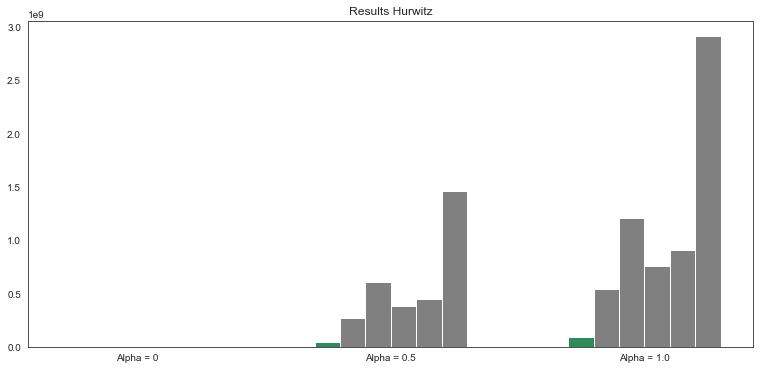

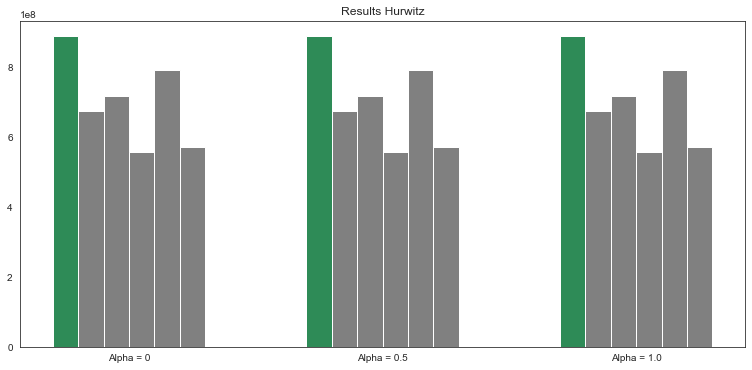

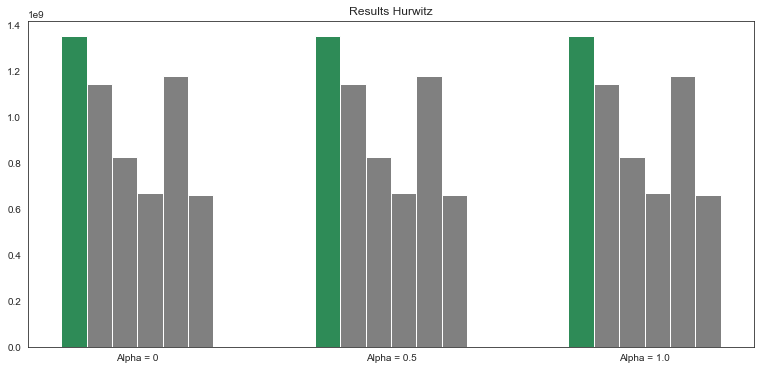

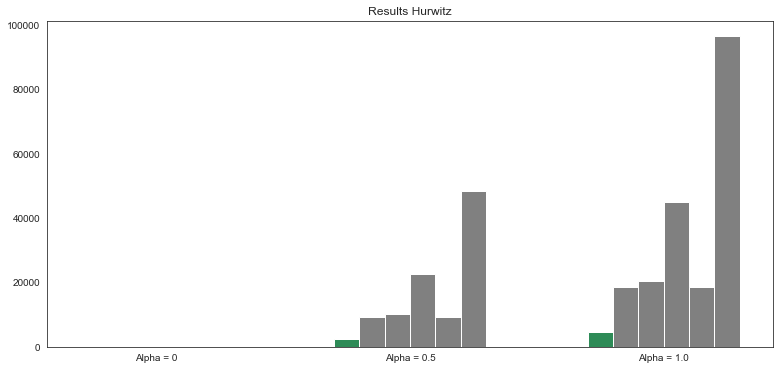

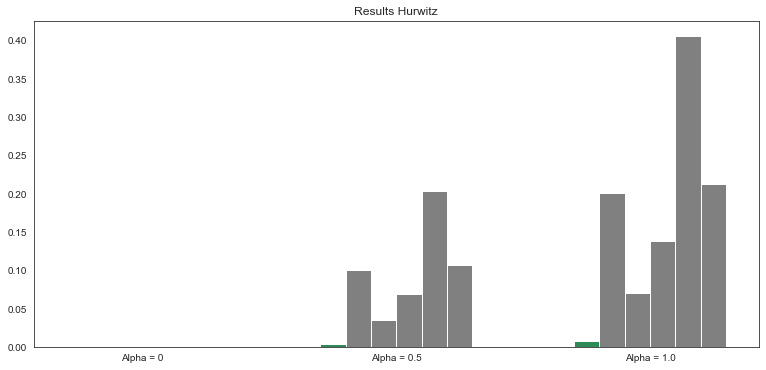

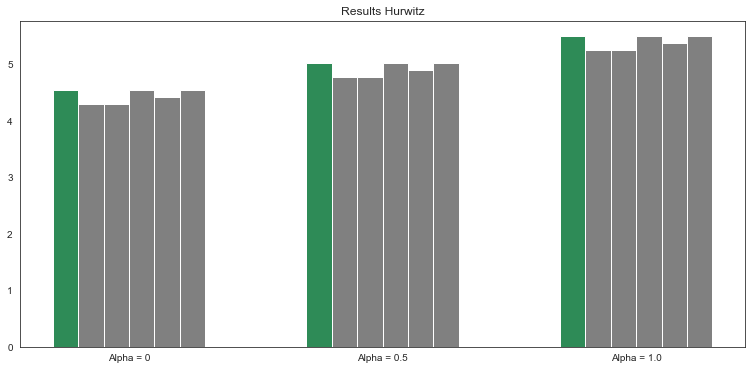

In [8]:
hurwitz_results(best_pol,objectives,1,rd_pol1,rd_pol2,rd_pol3,rd_pol4,rd_pol5)

{'Expected Annual Damage': 865395758168.382, 'Dike Investment Costs': 211.852, 'RfR Investment Costs': 0.0, 'Evacuation Costs': 2608.649, 'Expected Number of Deaths': 0.0, 'Minimum water level full network': 31.343}


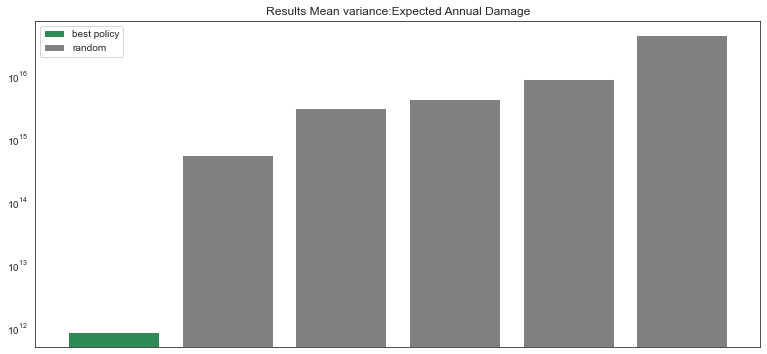

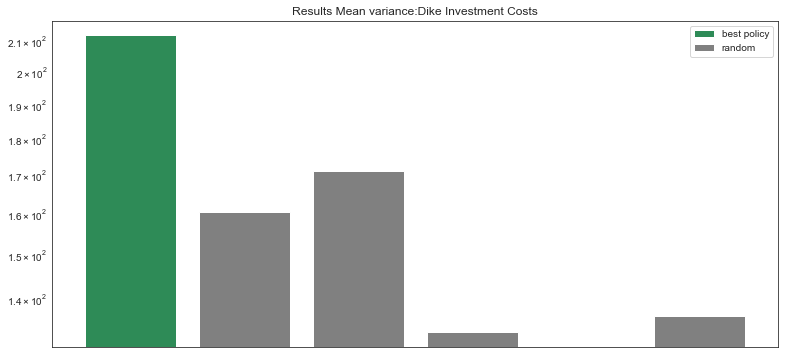

<ipython-input-7-e215075aaa18>:76: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


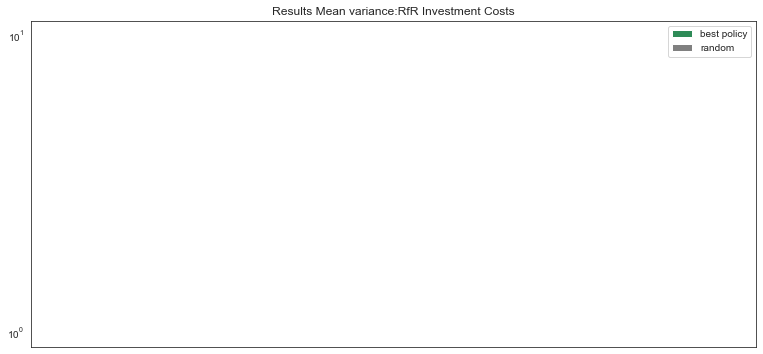

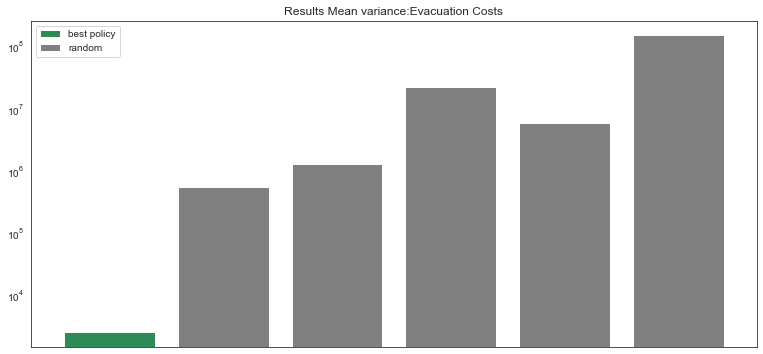

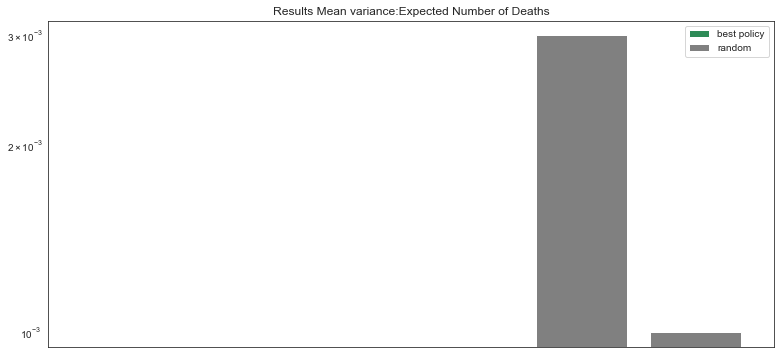

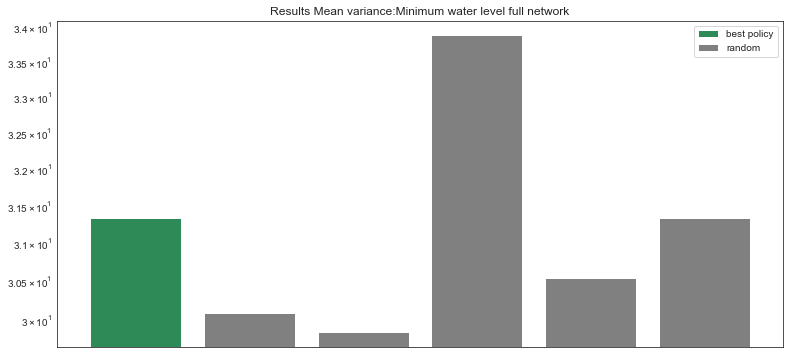

In [8]:
# Difference is so large it makes more sense to report as a table
mean_variance_results(best_pol,objectives,rd_pol1,rd_pol2,rd_pol3,rd_pol4,rd_pol5)

<ipython-input-6-3718c7e86f60>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MyQuantileBins'] =  pd.cut(data[column_name], 4)


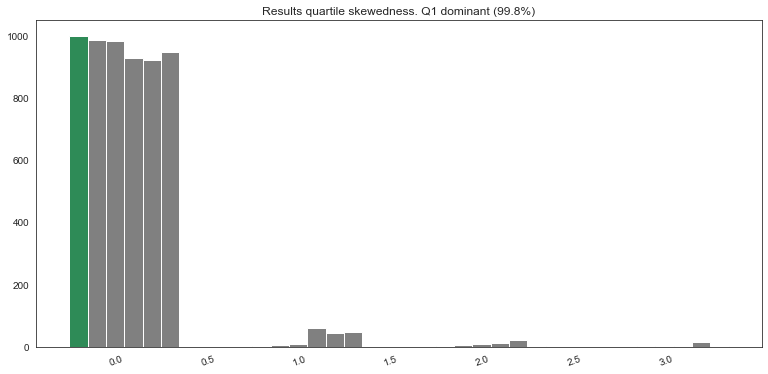

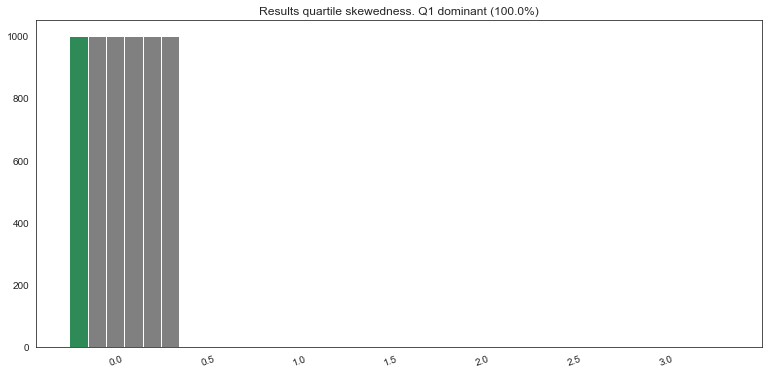

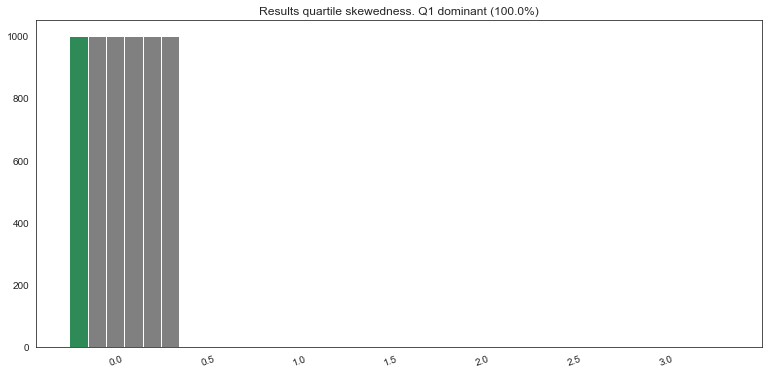

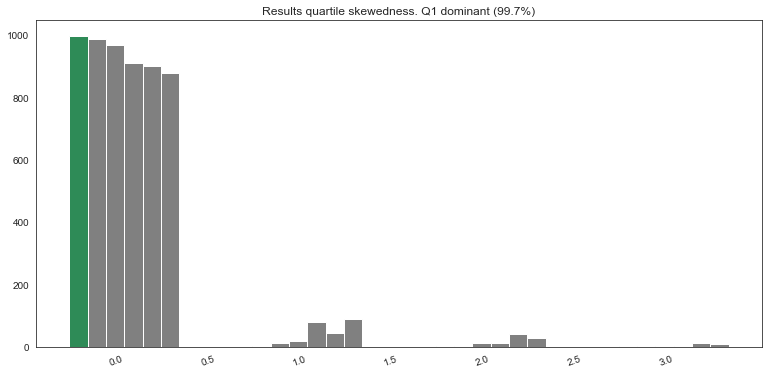

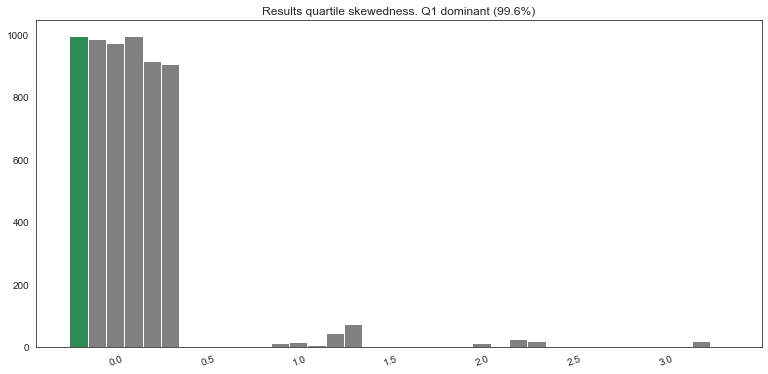

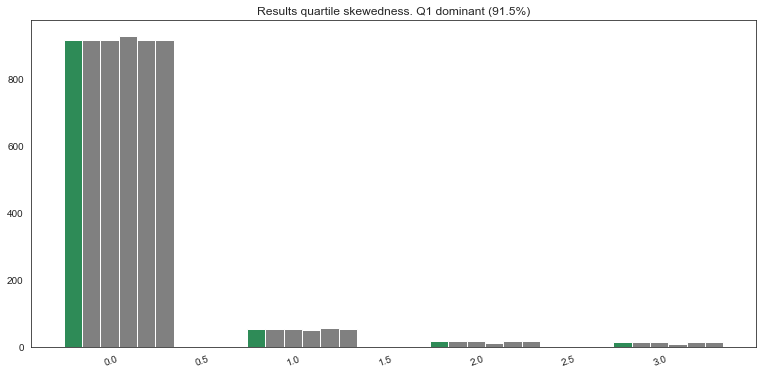

In [10]:
quartile_skewedness_results(best_pol,objectives,1,rd_pol1,rd_pol2,rd_pol3,rd_pol4,rd_pol5)